Mean Price: 4766729.25
Median Price: 4340000.00
Mode Price: 3500000

Variance: 3498544355820.57
Standard Deviation: 1870439.62



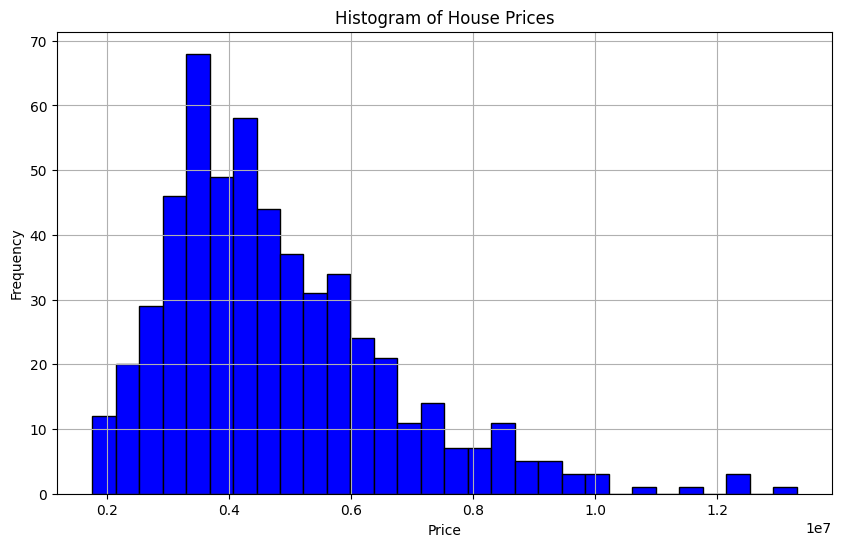


Multiple Linear Regression Evaluation:
R2 Score: 0.653
MAE: 970043.40
MSE: 1754318687330.67
RMSE: 1324506.96


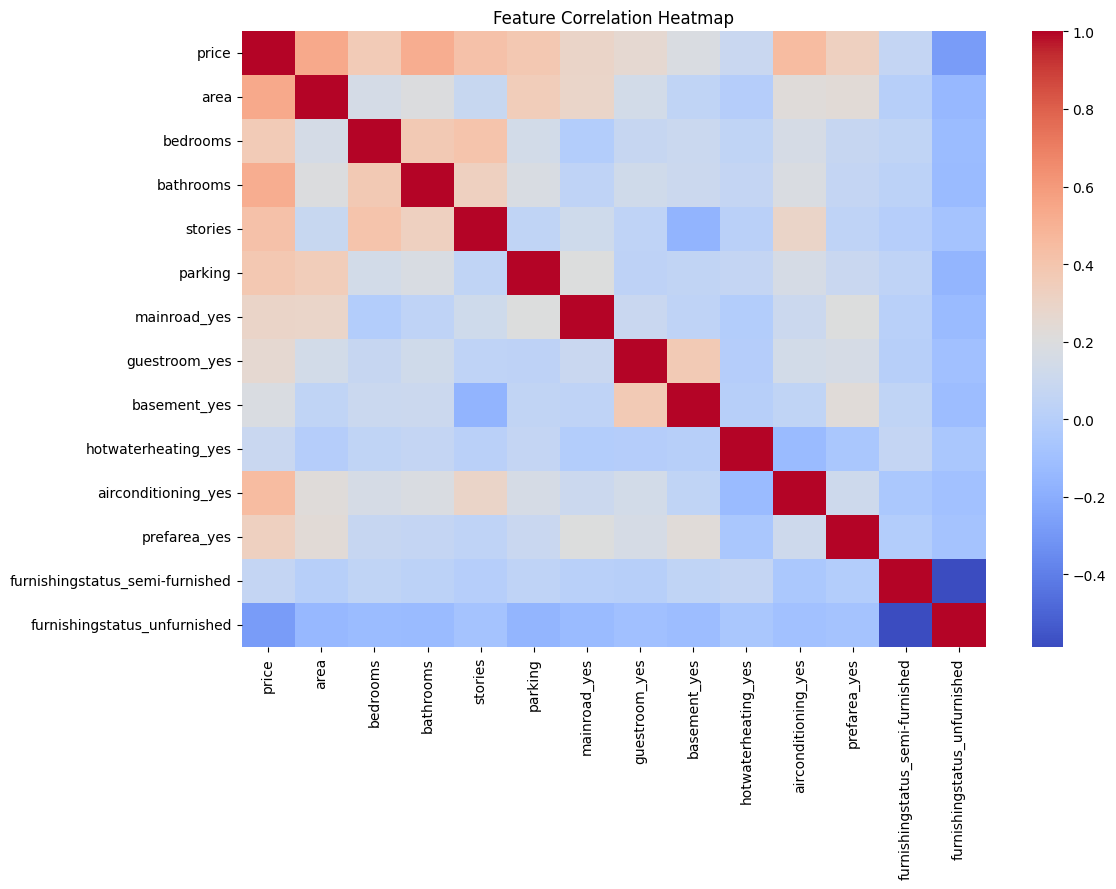


Best Decision Tree Params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

Optimized Decision Tree Evaluation:
R2 Score: 0.486
MAE: 1207548.55
MSE: 2597777774930.72
RMSE: 1611762.32

Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}

Optimized Random Forest Evaluation:
R2 Score: 0.607
MAE: 1039795.96
MSE: 1987689637112.05
RMSE: 1409854.47

📊 Model Comparison Summary:
                        Model  R2 Score           MAE          RMSE
0  Multiple Linear Regression  0.652924  9.700434e+05  1.324507e+06
1     Optimized Decision Tree  0.486054  1.207549e+06  1.611762e+06
2     Optimized Random Forest  0.606754  1.039796e+06  1.409854e+06


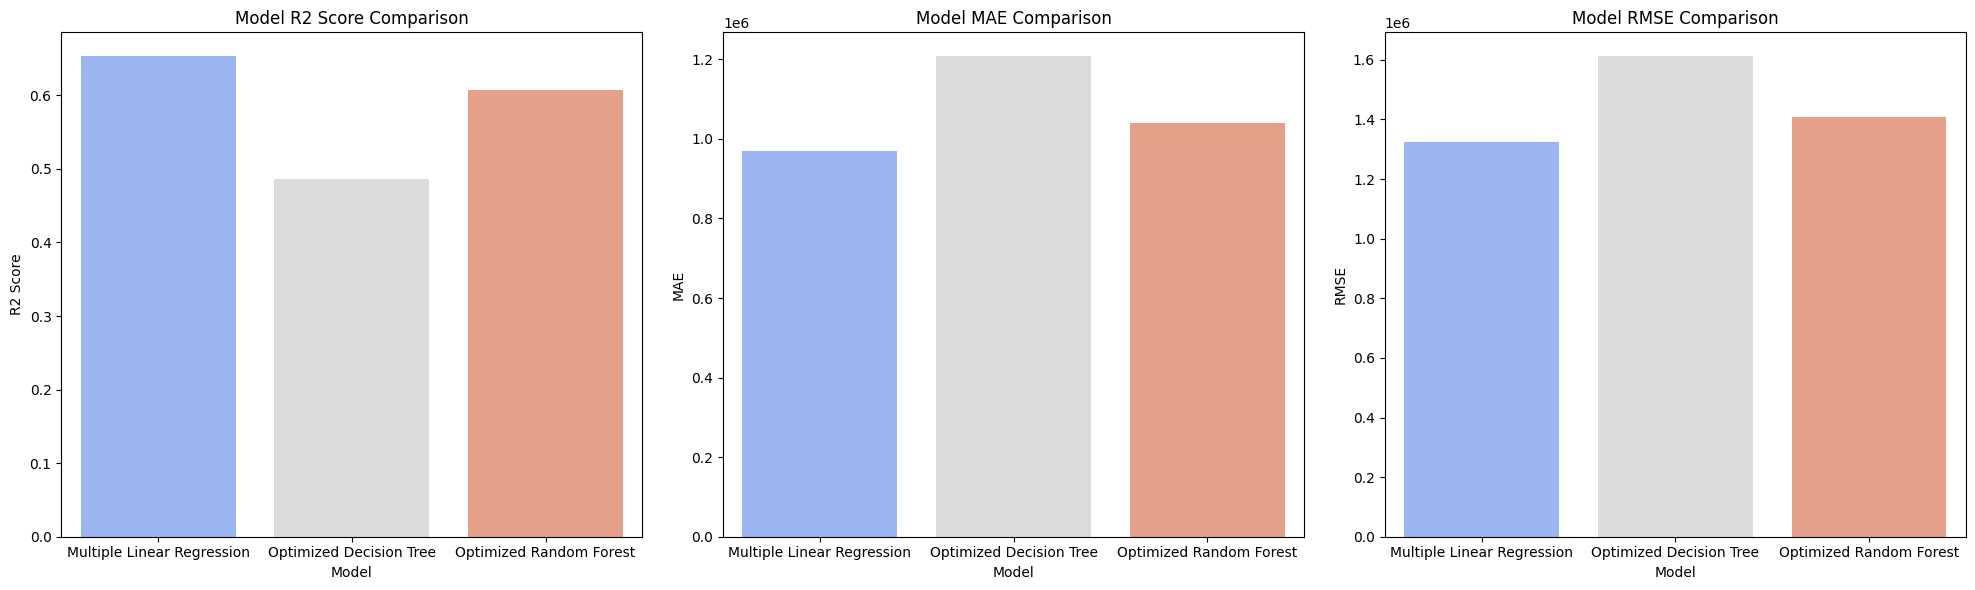

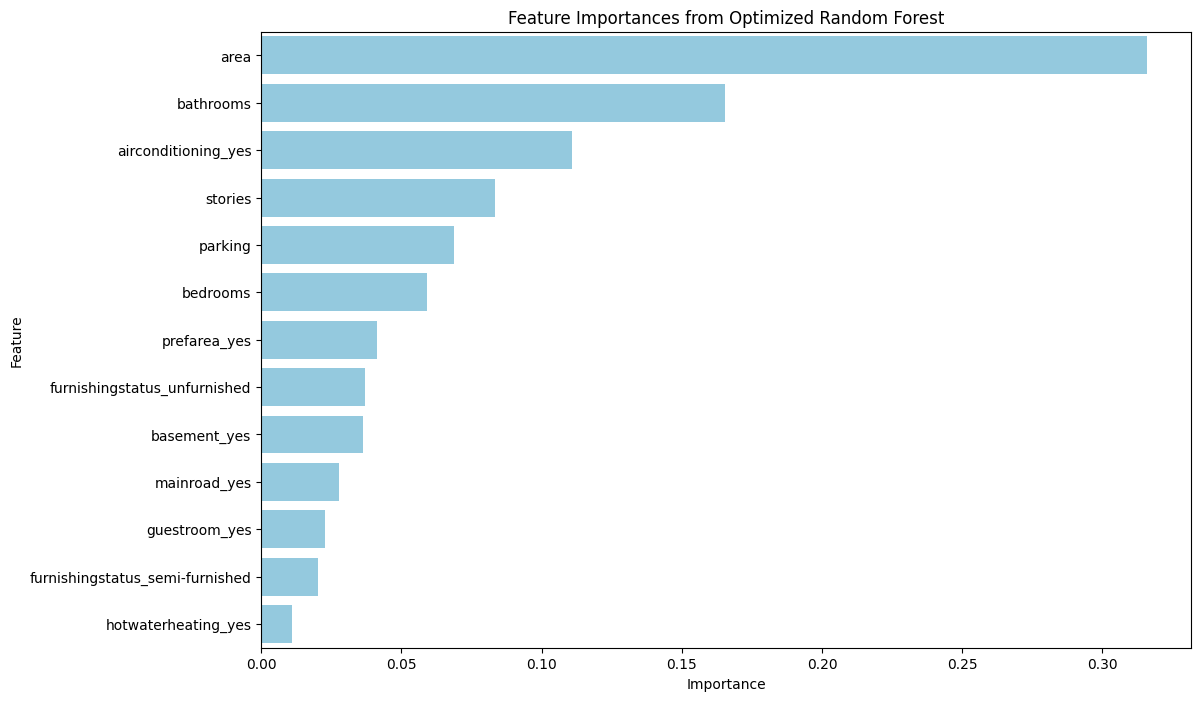

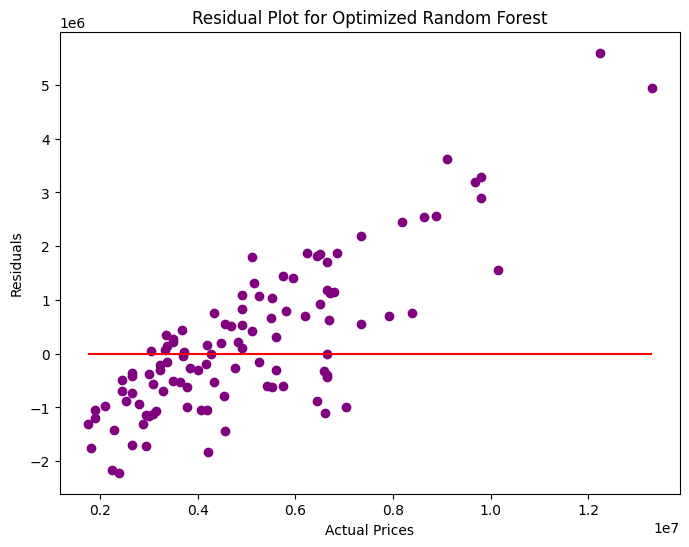

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

#Load Dataset
df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Documents\JupyterNoterbook\Housing.csv")

#Encode Categorical Variables
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#Statistics Summary
print(f"Mean Price: {df_encoded['price'].mean():.2f}")
print(f"Median Price: {np.median(df_encoded['price']):.2f}")
print(f"Mode Price: {df_encoded['price'].mode()[0]}\n")
print(f"Variance: {np.var(df_encoded['price'], ddof=1):.2f}")
print(f"Standard Deviation: {np.std(df_encoded['price'], ddof=1):.2f}\n")

#Histogram
plt.figure(figsize=(10,6))
plt.hist(df_encoded['price'], bins=30, color='blue', edgecolor='black')
plt.title("Histogram of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#Features & Target
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation:")
    print(f"R2 Score: {r2_score(y_true, y_pred):.3f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")

#Pipeline for Linear Regression (with Scaling)
pipeline_lin = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipeline_lin.fit(X_train, y_train)
y_pred_lin = pipeline_lin.predict(X_test)
evaluate_model(y_test, y_pred_lin, "Multiple Linear Regression")

#Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#Hyperparameter Tuning: Decision Tree (Grid Search)
param_grid_tree = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_tree = GridSearchCV(DecisionTreeRegressor(random_state=50), param_grid_tree, cv=5, scoring='r2', n_jobs=-1)
grid_tree.fit(X_train, y_train)
print("\nBest Decision Tree Params:", grid_tree.best_params_)
y_pred_tree_opt = grid_tree.predict(X_test)
evaluate_model(y_test, y_pred_tree_opt, "Optimized Decision Tree")

#Hyperparameter Tuning: Random Forest (Randomized Search for Speed)
param_dist_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
rand_rf = RandomizedSearchCV(RandomForestRegressor(random_state=50),
                             param_distributions=param_dist_rf,
                             n_iter=20, cv=5, scoring='r2', n_jobs=-1, random_state=42)
rand_rf.fit(X_train, y_train)
print("\nBest Random Forest Params:", rand_rf.best_params_)
y_pred_rf_opt = rand_rf.predict(X_test)
evaluate_model(y_test, y_pred_rf_opt, "Optimized Random Forest")

#Model Comparison Summary
summary = pd.DataFrame({
    'Model': ['Multiple Linear Regression', 'Optimized Decision Tree', 'Optimized Random Forest'],
    'R2 Score': [r2_score(y_test, y_pred_lin),
                 r2_score(y_test, y_pred_tree_opt),
                 r2_score(y_test, y_pred_rf_opt)],
    'MAE': [mean_absolute_error(y_test, y_pred_lin),
            mean_absolute_error(y_test, y_pred_tree_opt),
            mean_absolute_error(y_test, y_pred_rf_opt)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lin)),
             np.sqrt(mean_squared_error(y_test, y_pred_tree_opt)),
             np.sqrt(mean_squared_error(y_test, y_pred_rf_opt))]
})

print("\n📊 Model Comparison Summary:")
print(summary)

#Model Comparison Plot
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
metrics = ['R2 Score', 'MAE', 'RMSE']
for idx, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, hue='Model', data=summary, ax=axes[idx], palette='coolwarm', legend=False, errorbar=None)
    axes[idx].set_title(f"Model {metric} Comparison")
plt.tight_layout()
plt.show()

#Feature Importance Plot (Random Forest)
rf_model = rand_rf.best_estimator_
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances, y=feature_importances.index, color="skyblue")
plt.title("Feature Importances from Optimized Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

#Residual Plot for Random Forest
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test - y_pred_rf_opt, color='purple')
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red')
plt.title("Residual Plot for Optimized Random Forest")
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.show()


